In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.axes as ax
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("BankChurners.csv")

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Problem Statement - What are the key Value Drivers that Impacts Attrition Flag so the company can target specific demographics or group.

### Reviewing some info about this dataframe and checking to see if the Data needs to be Cleaned.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


### Overview of the total count of Existing Customer / Attrited Customer

<Axes: xlabel='Attrition_Flag', ylabel='count'>

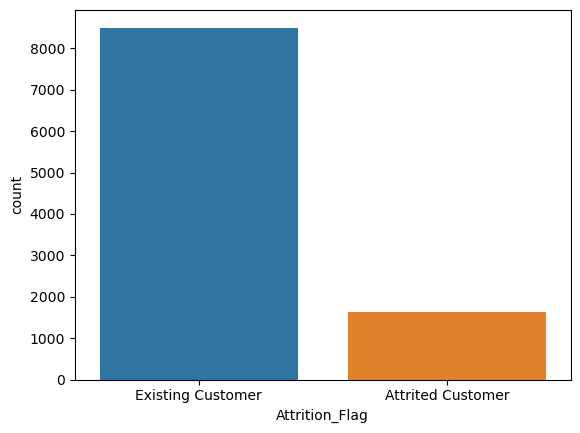

In [6]:
sns.countplot(data=df,x = 'Attrition_Flag')

### Creating a Combo Chart to find out the Percent Attrition based on Education Levels.

In [16]:
df.value_counts("Attrition_Flag") 

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
dtype: int64

In [17]:
df.value_counts("Education_Level")

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
dtype: int64

### Step 1 : Creating smaller table to store information we need.

In [63]:
df_education = df[["Attrition_Flag", "Education_Level"]].copy() 


In [19]:
df_education.head()

,Attrition_Flag,Education_Level
0,Existing Customer,High School
1,Existing Customer,Graduate
2,Existing Customer,Graduate
3,Existing Customer,High School
4,Existing Customer,Uneducated


### Step 2 : Assigning Binary number and converting Existing Customer : 0 and Attrited Customer : 1

In [64]:
 df_education["Attrition_Flag_binary"] = df_education["Attrition_Flag"].map({"Existing Customer": 0, "Attrited Customer": 1})

In [65]:
df_education.head()

,Attrition_Flag,Education_Level,Attrition_Flag_binary
0,Existing Customer,High School,0
1,Existing Customer,Graduate,0
2,Existing Customer,Graduate,0
3,Existing Customer,High School,0
4,Existing Customer,Uneducated,0


### Step 3 : Using Group by to sum and count.
> * Group by + sum will not affect the number 0
> * Group by + Count will include 0 when being counted.


In [179]:
df_attrition_number = df_education.groupby("Education_Level").sum()

/var/folders/_6/tsvwl7mj4wq1y64czljdw6bm0000gn/T/ipykernel_69113/1601065636.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [180]:
df_total_number = df_education.groupby("Education_Level").count()

In [192]:
df_attrition_number

,Attrition_count
Education_Level,
College,154
Doctorate,95
Graduate,487
High School,306
Post-Graduate,92
Uneducated,237
Unknown,256


In [182]:
df_total_number

,Attrition_Flag,Attrition_Flag_binary
Education_Level,,
College,1013,1013
Doctorate,451,451
Graduate,3128,3128
High School,2013,2013
Post-Graduate,516,516
Uneducated,1487,1487
Unknown,1519,1519


In [199]:
df_total_number.rename({"Attrition_count": "Attrition_total_count"}, axis = 1, inplace = True) 


In [200]:
df_total_number

,Attrition_Flag,Attrition_total_count
Education_Level,,
College,1013,1013
Doctorate,451,451
Graduate,3128,3128
High School,2013,2013
Post-Graduate,516,516
Uneducated,1487,1487
Unknown,1519,1519


### Step 4 : Calculating the rate and the percentage

In [201]:
df_attrition_rate = df_attrition_number["Attrition_count"] / df_total_number["Attrition_total_count"]

In [202]:
df_attrition_rate

Education_Level
College          0.152024
Doctorate        0.210643
Graduate         0.155691
High School      0.152012
Post-Graduate    0.178295
Uneducated       0.159381
Unknown          0.168532
dtype: float64

In [203]:

df_education_final = pd.concat([df_total_number,df_attrition_rate], axis = 1)

In [204]:
df_education_final

,Attrition_Flag,Attrition_total_count,0
Education_Level,,,
College,1013,1013,0.152024
Doctorate,451,451,0.210643
Graduate,3128,3128,0.155691
High School,2013,2013,0.152012
Post-Graduate,516,516,0.178295
Uneducated,1487,1487,0.159381
Unknown,1519,1519,0.168532


In [205]:
df_education_final.columns

Index(['Attrition_Flag', 'Attrition_total_count', 0], dtype='object')

In [206]:

df_education_final.rename({0: "Attrition_float"}, axis = 1,inplace = True)

In [207]:
df_education_final["Attrition_pct"] = df_education_final["Attrition_float"].map("{:.2%}".format)

In [208]:
df_education_final

,Attrition_Flag,Attrition_total_count,Attrition_float,Attrition_pct
Education_Level,,,,
College,1013,1013,0.152024,15.20%
Doctorate,451,451,0.210643,21.06%
Graduate,3128,3128,0.155691,15.57%
High School,2013,2013,0.152012,15.20%
Post-Graduate,516,516,0.178295,17.83%
Uneducated,1487,1487,0.159381,15.94%
Unknown,1519,1519,0.168532,16.85%


### Step 5 : Plotting the Data Frame that was created.

In [210]:
x = df_education_final.index
y1 = df_education_final["Attrition_total_count"]
y2 = df_education_final["Attrition_float"]
y3 = df_education_final["Attrition_pct"]

### This Combo chart of line and bar that shows Attrition Percentage for Different Education Levels
> * Line chart should show the Attrition Percentage
> * Bar chart should show the Total count.

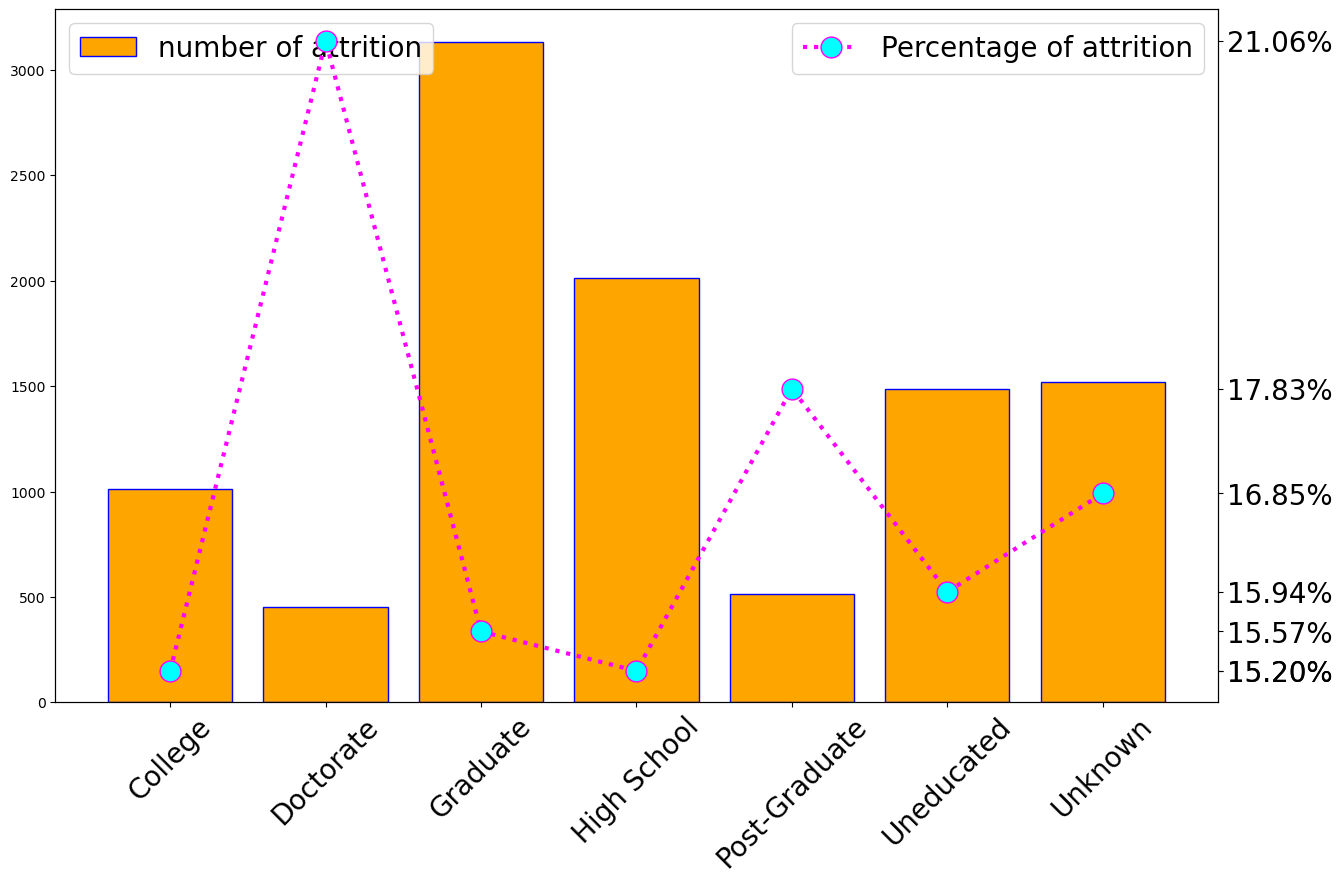

In [211]:
fig, ax = plt.subplots(figsize = (15,9))
# drawing the bar chart
ax.bar(x, y1,
color = "orange", edgecolor = "blue", label = "number of attrition")
ax.set_xticks(x, x, fontsize = 20, rotation = 45) # create a twin x so we have the right y axis
ax1 = ax.twinx()
# useing y2 the float to plot
ax1.plot(x, y2,
linewidth = 3, linestyle = ":", color = "magenta", marker = 'o', markersize = 15, markerfacecolor = "cyan", label = "Percentage of attrition")
# using y2 as value, y3 as ticks
ax1.set_yticks(y2, y3, fontsize = 20)
# plot the legend
ax.legend(loc = "upper left", fontsize = 20) 
ax1.legend(loc = "upper right", fontsize = 20)

plt.show()

### Creating similar Combo chart Regarding Income Category.

In [41]:
df.Income_Category.head()

0       $60K - $80K
1    Less than $40K
2      $80K - $120K
3    Less than $40K
4       $60K - $80K
Name: Income_Category, dtype: object

### Step 1: Creating table with information we need.

In [42]:
df_Income = df[["Attrition_Flag", "Income_Category"]].copy()

In [43]:
df_Income.head()

,Attrition_Flag,Income_Category
0,Existing Customer,$60K - $80K
1,Existing Customer,Less than $40K
2,Existing Customer,$80K - $120K
3,Existing Customer,Less than $40K
4,Existing Customer,$60K - $80K


### Step 2 : Assigning binary number to Attrition Flag

In [45]:
 df_Income["Attrition_Count"] = df_Income["Attrition_Flag"].map({"Existing Customer": 0, "Attrited Customer": 1})

In [78]:
df_Income.head()

,Attrition_Flag,Income_Category,Attrition_Count
0,Existing Customer,$60K - $80K,0
1,Existing Customer,Less than $40K,0
2,Existing Customer,$80K - $120K,0
3,Existing Customer,Less than $40K,0
4,Existing Customer,$60K - $80K,0


### Step 3: Using group by and sum/count function.

In [79]:
df_attrition_number = df_Income.groupby("Income_Category").sum()

/var/folders/_6/tsvwl7mj4wq1y64czljdw6bm0000gn/T/ipykernel_69113/2470181616.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [80]:
df_total_number = df_Income.groupby("Income_Category").count()

In [81]:
df_attrition_number

,Attrition_Count
Income_Category,
$120K +,126
$40K - $60K,271
$60K - $80K,189
$80K - $120K,242
Less than $40K,612
Unknown,187


### Step 4: Calculating the rate/percentage

In [82]:
df_attrition_Income = df_attrition_number["Attrition_Count"] / df_total_number["Attrition_Flag"]

In [83]:
df_attrition_Income

Income_Category
$120K +           0.173315
$40K - $60K       0.151397
$60K - $80K       0.134807
$80K - $120K      0.157655
Less than $40K    0.171862
Unknown           0.168165
dtype: float64

In [84]:
df_Income_final = pd.concat([df_total_number,df_attrition_Income], axis = 1)

In [85]:
df_Income_final

,Attrition_Flag,Attrition_Count,0
Income_Category,,,
$120K +,727,727,0.173315
$40K - $60K,1790,1790,0.151397
$60K - $80K,1402,1402,0.134807
$80K - $120K,1535,1535,0.157655
Less than $40K,3561,3561,0.171862
Unknown,1112,1112,0.168165


In [86]:
df_Income_final.rename({0: "Attrition_float"}, axis = 1,inplace = True)

In [87]:
df_Income_final["Attrition_pct"] = df_Income_final["Attrition_float"].map("{:.2%}".format)

In [88]:
df_Income_final

,Attrition_Flag,Attrition_Count,Attrition_float,Attrition_pct
Income_Category,,,,
$120K +,727,727,0.173315,17.33%
$40K - $60K,1790,1790,0.151397,15.14%
$60K - $80K,1402,1402,0.134807,13.48%
$80K - $120K,1535,1535,0.157655,15.77%
Less than $40K,3561,3561,0.171862,17.19%
Unknown,1112,1112,0.168165,16.82%


### Step 5: Plotting the Combo chart form the Data Frame Created.

In [90]:
x = df_Income_final.index
y1 = df_Income_final["Attrition_Count"] 
y2 = df_Income_final["Attrition_float"] 
y3 = df_Income_final["Attrition_pct"]


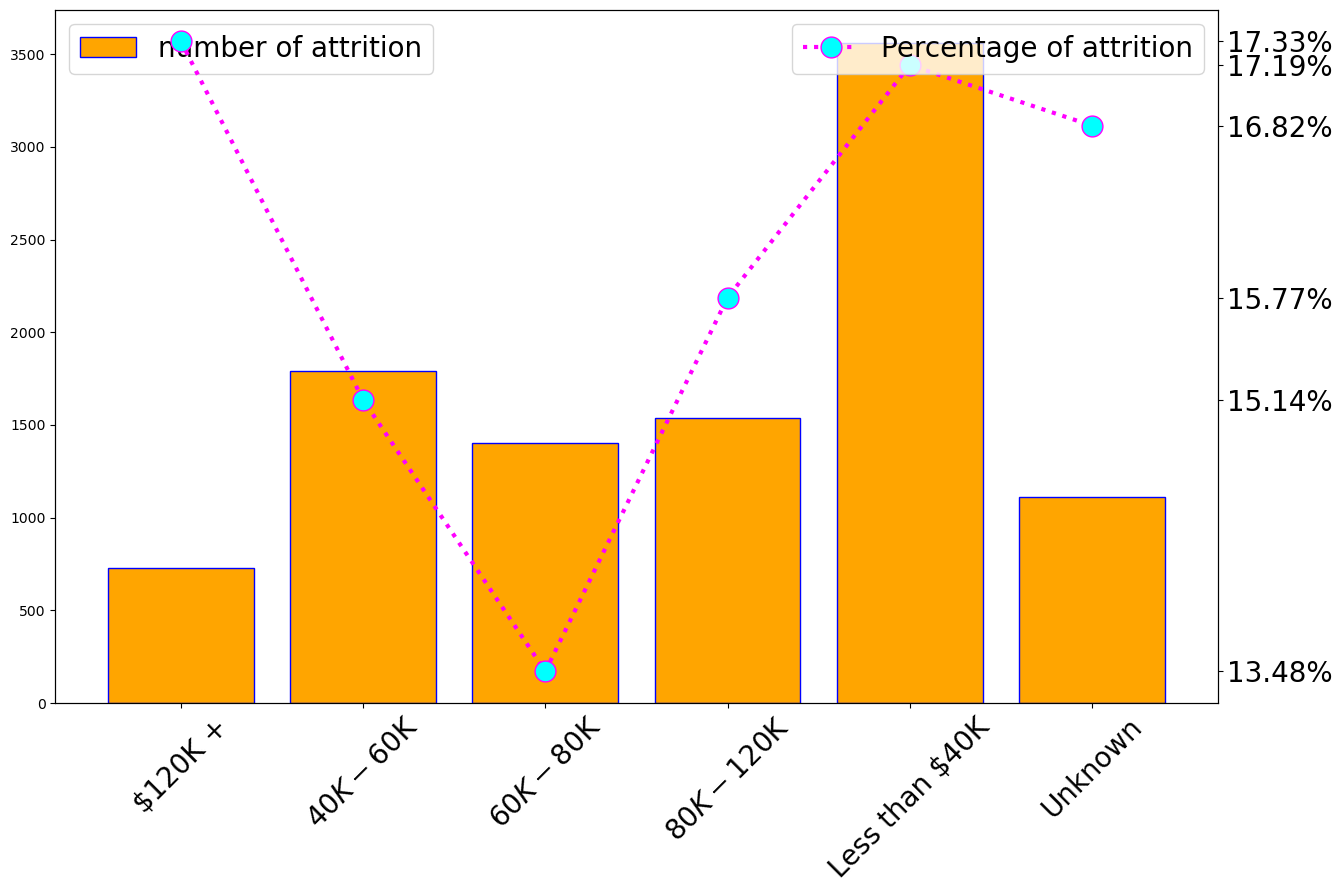

In [92]:
fig, ax = plt.subplots(figsize = (15,9))
# drawing the bar chart
ax.bar(x, y1,
color = "orange", edgecolor = "blue", label = "number of attrition")
ax.set_xticks(x, x, fontsize = 20, rotation = 45) # create a twin x so we have the right y axis
ax1 = ax.twinx()
# using y2 the float to plot
ax1.plot(x, y2,
linewidth = 3, linestyle = ":", color = "magenta", marker = 'o', markersize = 15, markerfacecolor = "cyan", label = "Percentage of attrition")
# using y2 as value, y3 as ticks
ax1.set_yticks(y2, y3, fontsize = 20)
# plot the legend
ax.legend(loc = "upper left", fontsize = 20) 
ax1.legend(loc = "upper right", fontsize = 20)
plt.show()

### Combo chart Regarding Attrition Percent of Marital Status.

### Step 1: Creating table with information we need.

In [99]:
df_Marital_Status = df[["Attrition_Flag", "Marital_Status"]].copy()

In [100]:
df_Marital_Status.head()

,Attrition_Flag,Marital_Status
0,Existing Customer,Married
1,Existing Customer,Single
2,Existing Customer,Married
3,Existing Customer,Unknown
4,Existing Customer,Married


### Step 2 : Assigning binary number to Attrition Flag

In [101]:
 df_Marital_Status["Attrition_Count"] = df_Marital_Status["Attrition_Flag"].map({"Existing Customer": 0, "Attrited Customer": 1})

### Step 3: Using group by and sum/count function.

In [103]:
df_attrition_marital = df_Marital_Status.groupby("Marital_Status").sum()

/var/folders/_6/tsvwl7mj4wq1y64czljdw6bm0000gn/T/ipykernel_69113/3119933910.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [104]:
df_total_marital = df_Marital_Status.groupby("Marital_Status").count()

In [108]:
df_total_marital

,Attrition_Flag,Attrition_Count
Marital_Status,,
Divorced,748,748
Married,4687,4687
Single,3943,3943
Unknown,749,749


### Step 4: Calculating the rate/percentage

In [110]:
df_marital_rate = df_attrition_marital["Attrition_Count"] / df_total_marital["Attrition_Flag"]

In [111]:
df_marital_rate 

Marital_Status
Divorced    0.161765
Married     0.151269
Single      0.169414
Unknown     0.172230
dtype: float64

In [112]:
df_Marital_final = pd.concat([df_total_marital,df_marital_rate], axis = 1)

In [113]:
df_Marital_final

,Attrition_Flag,Attrition_Count,0
Marital_Status,,,
Divorced,748,748,0.161765
Married,4687,4687,0.151269
Single,3943,3943,0.169414
Unknown,749,749,0.172230


In [114]:
df_Marital_final.rename({0: "Attrition_float"}, axis = 1,inplace = True)

In [115]:
df_Marital_final["Attrition_pct"] = df_Marital_final["Attrition_float"].map("{:.2%}".format)

In [116]:
df_Marital_final

,Attrition_Flag,Attrition_Count,Attrition_float,Attrition_pct
Marital_Status,,,,
Divorced,748,748,0.161765,16.18%
Married,4687,4687,0.151269,15.13%
Single,3943,3943,0.169414,16.94%
Unknown,749,749,0.172230,17.22%


### Step 5: Plotting the Combo chart form the Data Frame Created.

In [120]:
x = df_Marital_final.index
y1 = df_Marital_final["Attrition_Count"] 
y2 = df_Marital_final["Attrition_float"] 
y3 = df_Marital_final["Attrition_pct"]

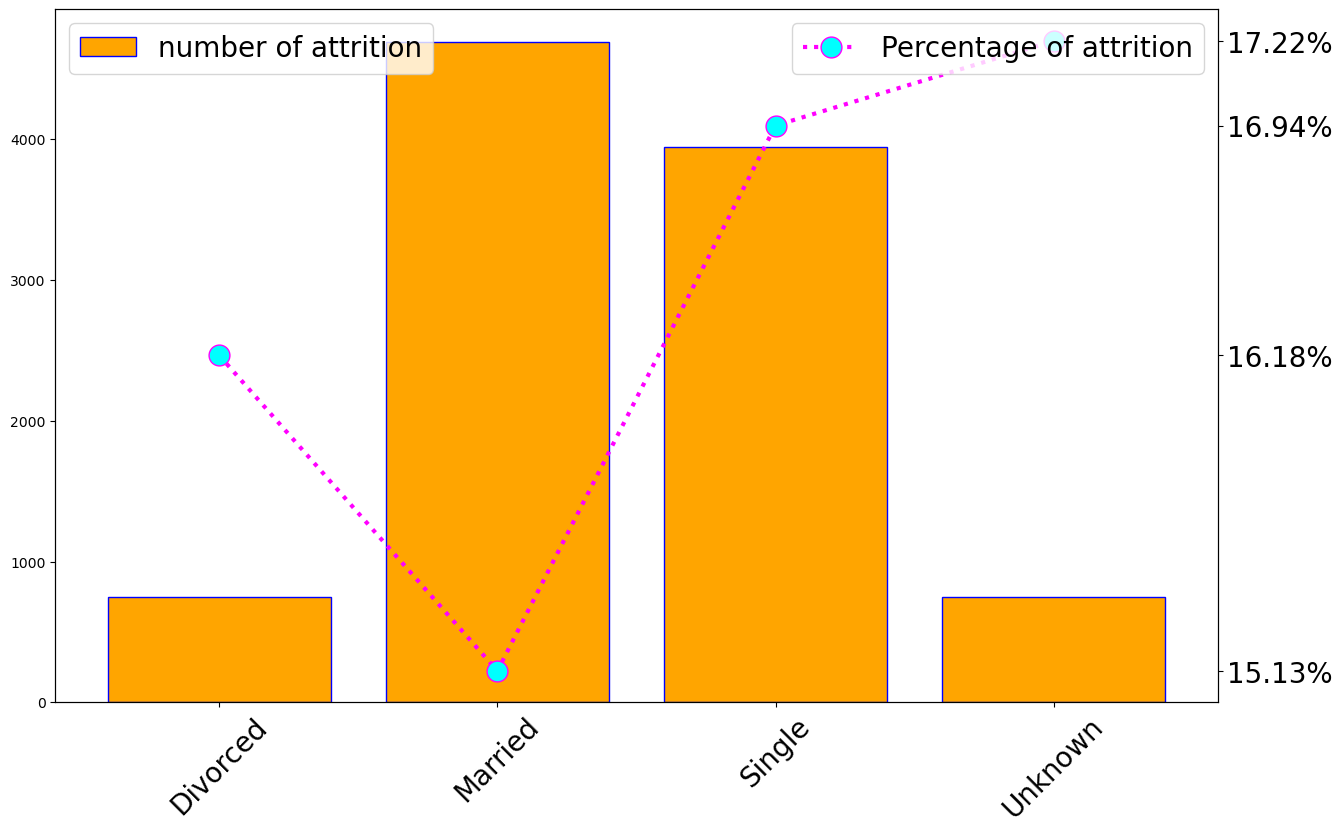

In [121]:
fig, ax = plt.subplots(figsize = (15,9))
# drawing the bar chart
ax.bar(x, y1,
color = "orange", edgecolor = "blue", label = "number of attrition")
ax.set_xticks(x, x, fontsize = 20, rotation = 45) # create a twin x so we have the right y axis
ax1 = ax.twinx()
# using y2 the float to plot
ax1.plot(x, y2,
linewidth = 3, linestyle = ":", color = "magenta", marker = 'o', markersize = 15, markerfacecolor = "cyan", label = "Percentage of attrition")
# using y2 as value, y3 as ticks
ax1.set_yticks(y2, y3, fontsize = 20)
# plot the legend
ax.legend(loc = "upper left", fontsize = 20) 
ax1.legend(loc = "upper right", fontsize = 20)
plt.show()

### Creating Combo Chart Regarding Percent attrition of Dependent Count

### Step 1: Creating table with information we need.

In [125]:
df_dependent = df[["Attrition_Flag", "Dependent_count"]]

### Step 2 : Assigning binary number to Attrition Flag

In [151]:
df_dependent["Attrition_dependent_Count"] = df_dependent["Attrition_Flag"].map({"Existing Customer": 0, "Attrited Customer": 1})

/var/folders/_6/tsvwl7mj4wq1y64czljdw6bm0000gn/T/ipykernel_69113/1999130281.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Step 3: Using group by and sum/count function.

In [158]:
df_dependent_sum = df_dependent.groupby("Dependent_count").sum()

/var/folders/_6/tsvwl7mj4wq1y64czljdw6bm0000gn/T/ipykernel_69113/2247624731.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [159]:
df_dependent_count = df_dependent.groupby("Dependent_count").count()

In [168]:
df_dependent_count

,Attrition_Flag,Attrition_Count,Attrition_dependent_Count
Dependent_count,,,
0,904,904,904
1,1838,1838,1838
2,2655,2655,2655
3,2732,2732,2732
4,1574,1574,1574
5,424,424,424


In [212]:
df_dependent_sum 

,Attrition_Count,Attrition_dependent_Count
Dependent_count,,
0,135,135
1,269,269
2,417,417
3,482,482
4,260,260
5,64,64


### Step 4: Calculating the rate/percentage

In [162]:
df_dependent_rate = df_dependent_sum["Attrition_dependent_Count"] / df_dependent_count["Attrition_Count"]

In [163]:
df_dependent_rate

Dependent_count
0    0.149336
1    0.146355
2    0.157062
3    0.176428
4    0.165184
5    0.150943
dtype: float64

In [164]:
df_dependent_final = pd.concat([df_dependent_count,df_dependent_rate], axis = 1)

In [166]:
df_dependent_final.rename({0 : "Attrition_float"} , axis = 1, inplace = True)

In [167]:
df_dependent_final

,Attrition_Flag,Attrition_Count,Attrition_dependent_Count,Attrition_float
Dependent_count,,,,
0,904,904,904,0.149336
1,1838,1838,1838,0.146355
2,2655,2655,2655,0.157062
3,2732,2732,2732,0.176428
4,1574,1574,1574,0.165184
5,424,424,424,0.150943


In [169]:
df_dependent_final["Attrition_pct"] = df_dependent_final["Attrition_float"].map("{:.2%}".format)

### Step 5: Plotting the Combo chart form the Data Frame Created.

In [172]:
x = df_dependent_final.index
y1 = df_dependent_final["Attrition_Count"] 
y2 = df_dependent_final["Attrition_float"] 
y3 = df_dependent_final["Attrition_pct"]

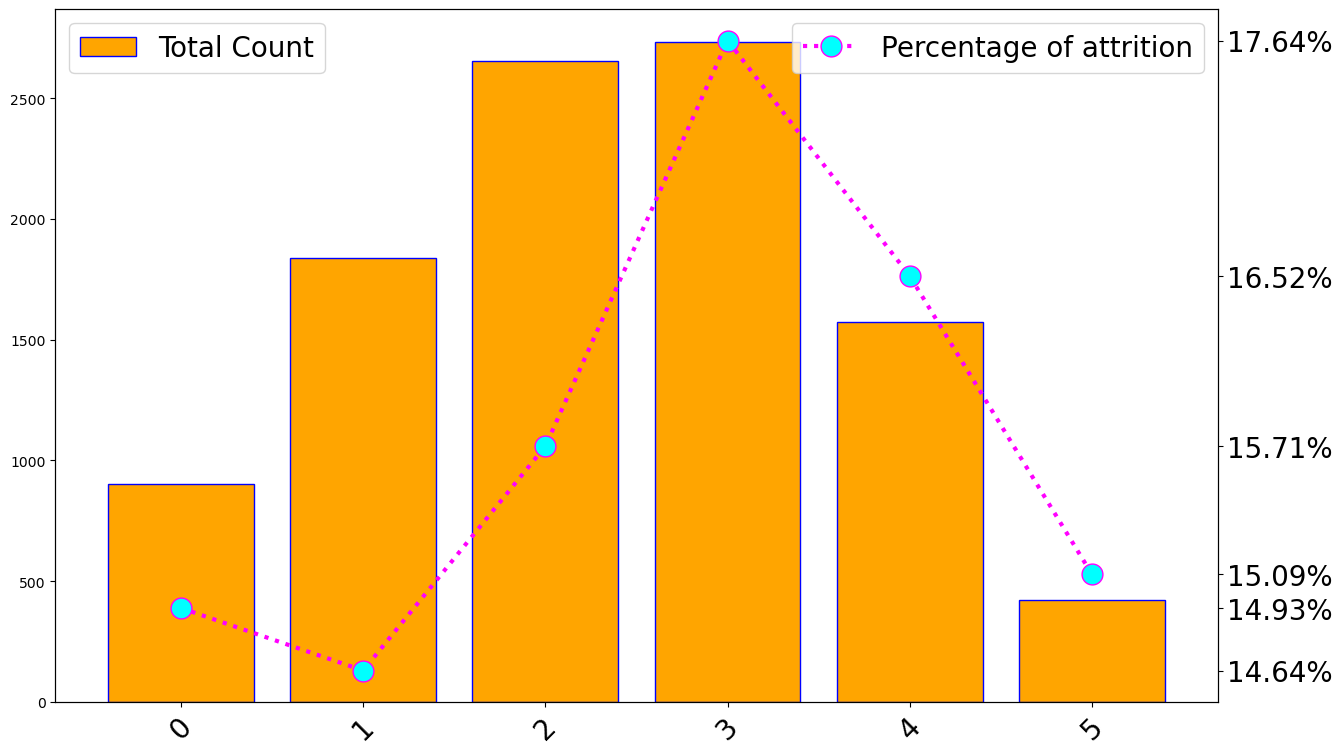

In [175]:
fig, ax = plt.subplots(figsize = (15,9))
# drawing the bar chart
ax.bar(x, y1,
color = "orange", edgecolor = "blue", label = "Total Count")
ax.set_xticks(x, x, fontsize = 20, rotation = 45) # create a twin x so we have the right y axis
ax1 = ax.twinx()
# using y2 the float to plot
ax1.plot(x, y2,
linewidth = 3, linestyle = ":", color = "magenta", marker = 'o', markersize = 15, markerfacecolor = "cyan", label = "Percentage of attrition")
# using y2 as value, y3 as ticks
ax1.set_yticks(y2, y3, fontsize = 20)
# plot the legend
ax.legend(loc = "upper left", fontsize = 20) 
ax1.legend(loc = "upper right", fontsize = 20)
plt.show()

### Combo chart regarding Card category Attrition Percentage.

### Step 1: Creating table with information we need.

In [246]:
df_card = df[["Attrition_Flag", "Card_Category"]].copy()

### Step 2 : Assigning binary number to Attrition Flag

In [276]:
df_card["Attrition_binary"] = df_card["Attrition_Flag"].map({"Existing Customer": 0, "Attrited Customer": 1})

### Step 3: Using group by and sum/count function.

In [277]:
df_card_number = df_card.groupby("Card_Category").sum()

/var/folders/_6/tsvwl7mj4wq1y64czljdw6bm0000gn/T/ipykernel_69113/2718256964.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [278]:
df_card_number

,Attrition_count,Attrition_binary
Card_Category,,
Blue,1519,1519
Gold,21,21
Platinum,5,5
Silver,82,82


In [279]:
df_card_totalcount = df_card.groupby("Card_Category").count()

In [280]:
df_card_totalcount

,Attrition_Flag,Attrition_count,Attrition_binary
Card_Category,,,
Blue,9436,9436,9436
Gold,116,116,116
Platinum,20,20,20
Silver,555,555,555


### Step 4: Calculating the rate/percentage

In [281]:
df_attrition_cardrate = df_card_number["Attrition_count"] / df_card_totalcount["Attrition_binary"]

In [282]:
df_attrition_cardrate

Card_Category
Blue        0.160979
Gold        0.181034
Platinum    0.250000
Silver      0.147748
dtype: float64

In [283]:
df_card_final = pd.concat([df_card_totalcount,df_attrition_cardrate], axis = 1)

In [284]:
df_card_final

,Attrition_Flag,Attrition_count,Attrition_binary,0
Card_Category,,,,
Blue,9436,9436,9436,0.160979
Gold,116,116,116,0.181034
Platinum,20,20,20,0.250000
Silver,555,555,555,0.147748


In [285]:
df_card_final.rename({0: "Attrition_float"}, axis = 1,inplace = True)

In [290]:
df_card_final["Attrition_pct"] = df_card_final["Attrition_float"].map("{:.2%}".format)

In [291]:
df_card_final

,Attrition_Flag,Attrition_count,Attrition_binary,Attrition_float,Attrition_pct
Card_Category,,,,,
Blue,9436,9436,9436,0.160979,16.10%
Gold,116,116,116,0.181034,18.10%
Platinum,20,20,20,0.250000,25.00%
Silver,555,555,555,0.147748,14.77%


### Step 5: Plotting the Combo chart form the Data Frame Created.

In [292]:
x = df_card_final.index
y1 = df_card_final["Attrition_count"] 
y2 = df_card_final["Attrition_float"] 
y3 = df_card_final["Attrition_pct"]

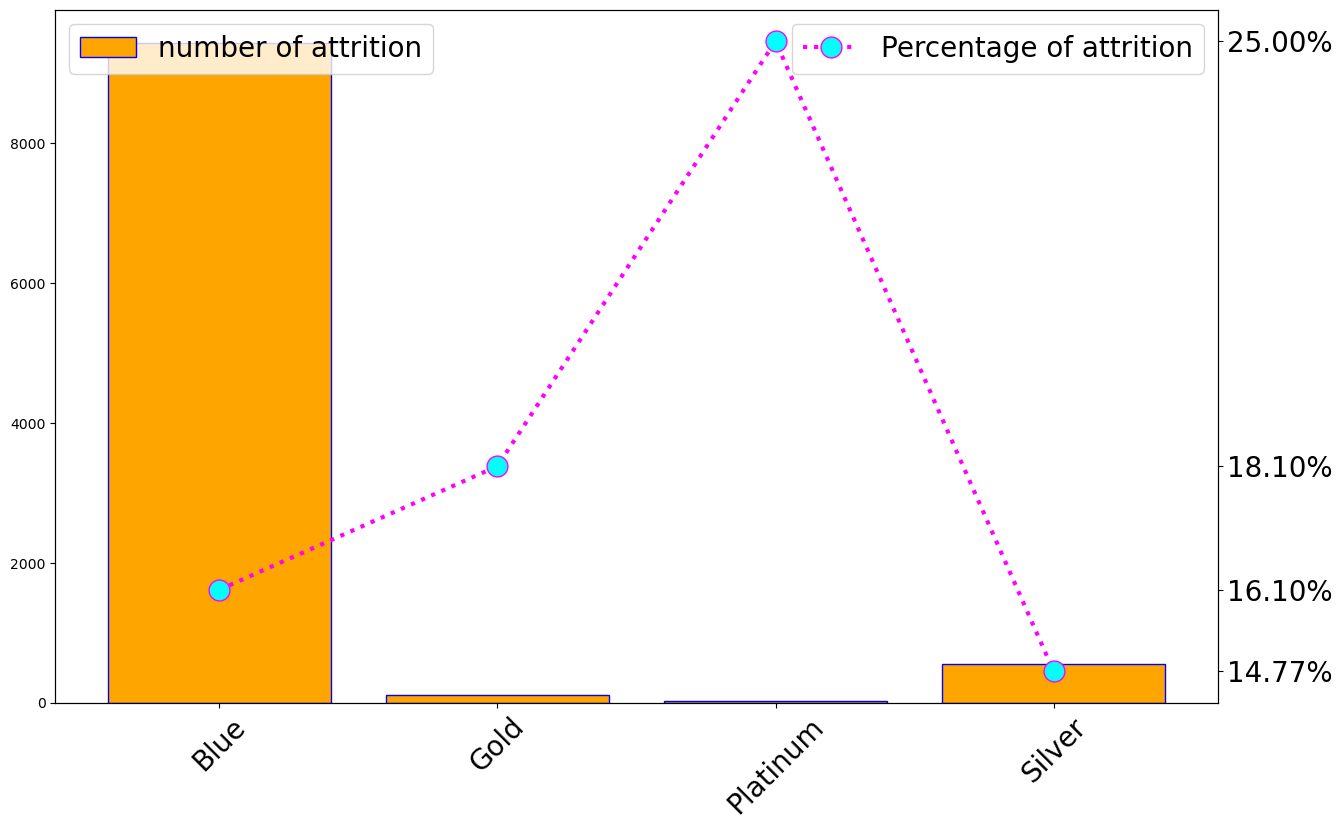

In [293]:
fig, ax = plt.subplots(figsize = (15,9))
# drawing the bar chart
ax.bar(x, y1,
color = "orange", edgecolor = "blue", label = "number of attrition")
ax.set_xticks(x, x, fontsize = 20, rotation = 45) # create a twin x so we have the right y axis
ax1 = ax.twinx()
# using y2 the float to plot
ax1.plot(x, y2,
linewidth = 3, linestyle = ":", color = "magenta", marker = 'o', markersize = 15, markerfacecolor = "cyan", label = "Percentage of attrition")
# using y2 as value, y3 as ticks
ax1.set_yticks(y2, y3, fontsize = 20)
# plot the legend
ax.legend(loc = "upper left", fontsize = 20) 
ax1.legend(loc = "upper right", fontsize = 20)
plt.show()

### Attrition Regarding Credit Card Customer Age.

In [323]:
df_Age = df[["Attrition_Flag", "Customer_Age"]].copy()

In [346]:
df_Age["Attrition_binary"] = df_Age["Attrition_Flag"].map({"Existing Customer": 0, "Attrited Customer": 1})

In [351]:
df_Age_sum = df_Age.groupby("Customer_Age").sum()


/var/folders/_6/tsvwl7mj4wq1y64czljdw6bm0000gn/T/ipykernel_69113/2204573578.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [349]:
df_Age_count = df_Age.groupby("Customer_Age").count()

In [356]:
df_attrition_Agerate = df_Age_sum["Attrition_binary"] / df_Age_count["Attrition_Flag"]

In [362]:
df_age_final = pd.concat([df_Age_count,df_attrition_Agerate], axis = 1)

In [364]:
df_age_final.rename({0: "Attrition_float"}, axis = 1,inplace = True)

In [365]:
df_age_final["Attrition_pct"] = df_age_final["Attrition_float"].map("{:.2%}".format)

In [366]:
df_age_final

,Attrition_Flag,Attrition_binary,Attrition_float,Attrition_pct
Customer_Age,,,,
26,78,78,0.076923,7.69%
27,32,32,0.093750,9.38%
28,29,29,0.034483,3.45%
29,56,56,0.125000,12.50%
30,70,70,0.214286,21.43%
31,91,91,0.142857,14.29%
32,106,106,0.160377,16.04%
33,127,127,0.157480,15.75%
34,146,146,0.130137,13.01%


In [374]:
x = df_age_final.index
y1 = df_age_final["Attrition_binary"] 
y2 = df_age_final["Attrition_float"] 
y3 = df_age_final["Attrition_pct"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


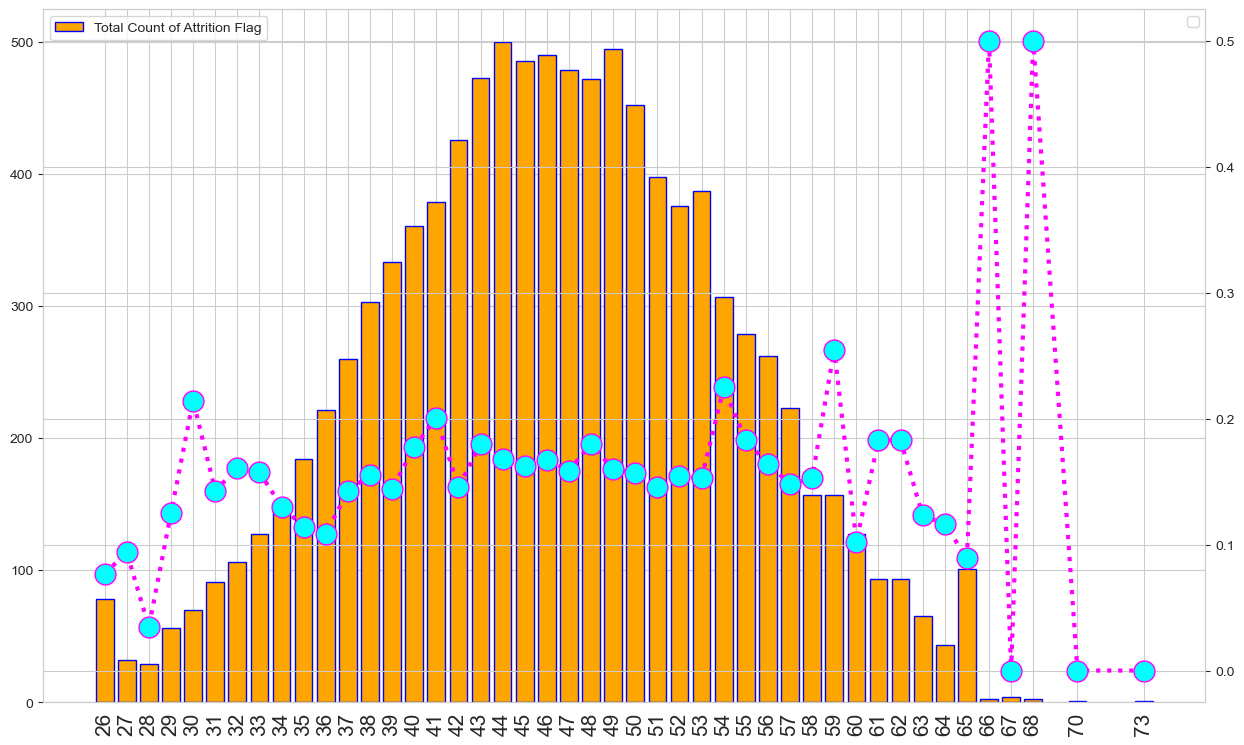

In [386]:
fig, ax = plt.subplots(figsize = (15,9))
# drawing the bar chart
ax.bar(x, y1,
color = "orange", edgecolor = "blue", label = "Total Count of Attrition Flag")
ax.set_xticks(x, x, fontsize = 15, rotation = 90) # create a twin x so we have the right y axis
ax1 = ax.twinx()
# using y2 the float to plot
ax1.plot(x, y2,
linewidth = 3, linestyle = ":", color = "magenta", marker = 'o', markersize = 15, markerfacecolor = "cyan")
# using y2 as value, y3 as ticks

# plot the legend
ax.legend(loc = "upper left", fontsize = 10) 
ax1.legend(loc = "upper right", fontsize = 10)
plt.show()